In [1]:
import pandas as pd
import numpy as np
import pyodbc 
import warnings
warnings.filterwarnings("ignore")

In [5]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=localhost\SQLEXPRESS;'
    'DATABASE=shopping trends;'
    'Trusted_Connection=yes;'
)

In [6]:
conn = pyodbc.connect(conn_str)

In [7]:
query = "SELECT * FROM dbo.shopping_trends"

df = pd.read_sql(query, conn)

df.head() 

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
df.shape

(3900, 19)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.isna().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [16]:
Item_Purchased = df['Item_Purchased'].value_counts().reset_index()
Item_Purchased

,Item_Purchased,count
0,Blouse,171
1,Pants,171
2,Jewelry,171
3,Shirt,169
4,Dress,166
5,Sweater,164
6,Jacket,163
7,Coat,161
8,Sunglasses,161
9,Belt,161


In [18]:
item = df.groupby('Item_Purchased')['Purchase_Amount_USD'].sum().reset_index()
item

,Item_Purchased,Purchase_Amount_USD
0,Backpack,8636
1,Belt,9635
2,Blouse,10410
3,Boots,9018
4,Coat,9275
5,Dress,10320
6,Gloves,8477
7,Handbag,8857
8,Hat,9375
9,Hoodie,8767


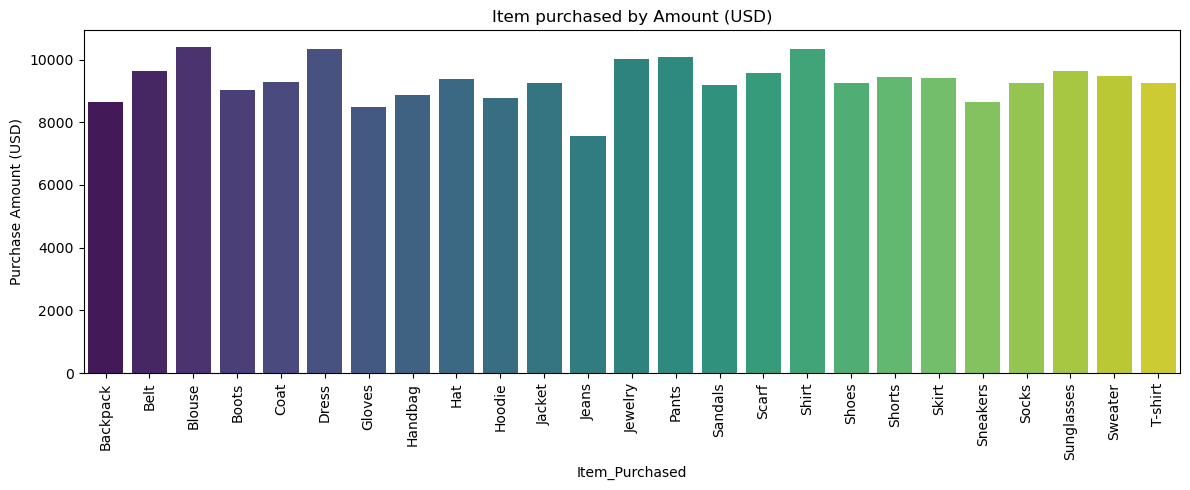

In [19]:
plt.figure(figsize = (12, 5))
sns.barplot(data = item, x = 'Item_Purchased',y = 'Purchase_Amount_USD',palette = 'viridis')
plt.title('Item purchased by Amount (USD)')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
Numbers_Category = df['Category'].value_counts()
Numbers_Category

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

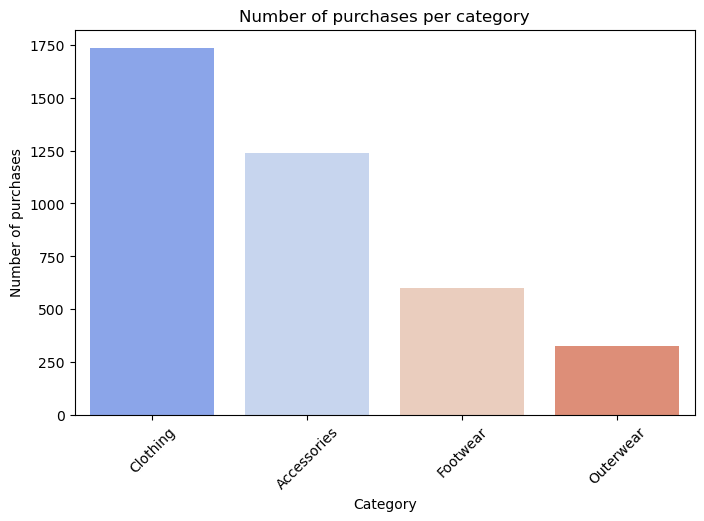

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Category", palette="coolwarm", order=df["Category"].value_counts().index)
plt.title("Number of purchases per category")
plt.xlabel("Category")
plt.ylabel("Number of purchases")
plt.xticks(rotation=45)
plt.show()

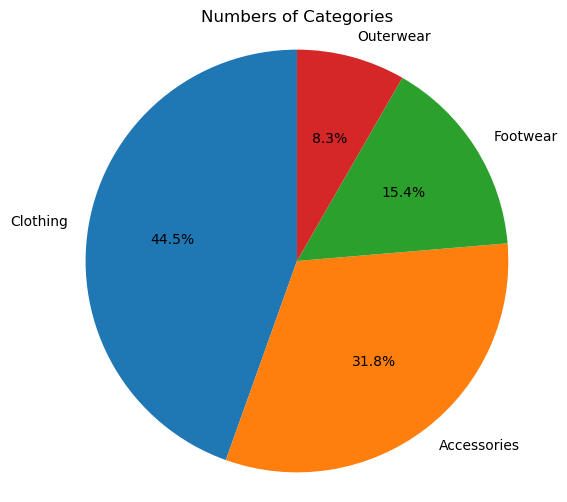

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.pie(Numbers_Category, labels = Numbers_Category.index, autopct = '%1.1f%%', startangle = 90 )

plt.title('Numbers of Categories')
plt.axis('equal')  
plt.show()

In [23]:
counts = df['Gender'].value_counts()
counts

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [24]:
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100.0 * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

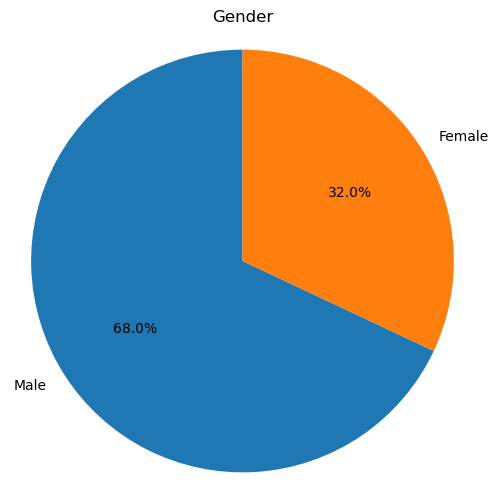

In [25]:
plt.figure(figsize = (6, 6))
plt.pie(counts, labels = counts.index, autopct = '%1.1f%%', startangle = 90)

plt.title('Gender')
plt.axis('equal')
plt.show()

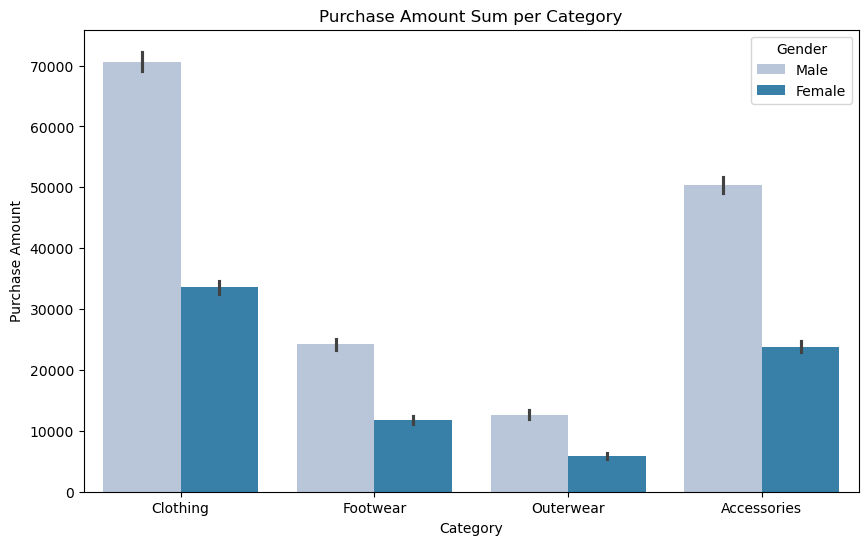

In [27]:
plt.figure(figsize = (10,6))
sns.barplot(df, x = 'Category', y = 'Purchase_Amount_USD', hue= 'Gender', palette = 'PuBu', estimator = np.sum)
plt.title("Purchase Amount Sum per Category")
plt.xlabel("Category")
plt.ylabel("Purchase Amount")

plt.show()

In [32]:
df["Age Group"] = pd.cut(df["Age"], bins=[18, 30, 45, 60, 75], labels=["18-30", "31-45", "46-60", "61-75"])
pivot_age = df.pivot_table(index="Age Group", values="Previous_Purchases", aggfunc="mean")
pivot_age

,Previous_Purchases
Age Group,
18-30,25.113636
31-45,24.918573
46-60,25.767401
61-75,26.055325


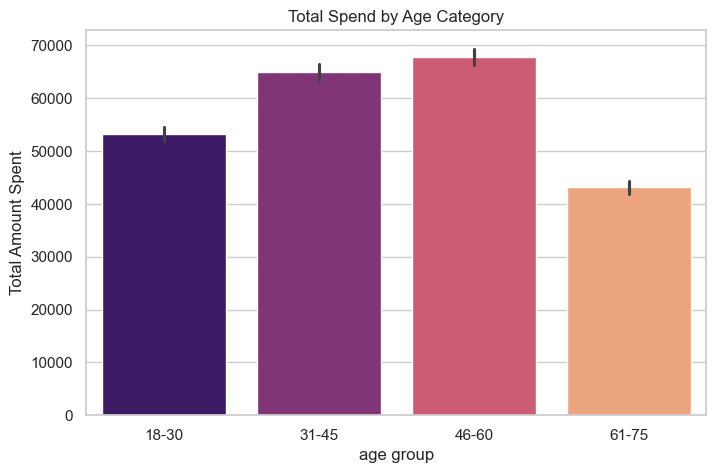

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Age Group", y="Purchase_Amount_USD", palette="magma", estimator=sum)
plt.title("Total Spend by Age Category")
plt.xlabel("age group")
plt.ylabel("Total Amount Spent")
plt.show()

In [35]:
pivot_season = df.pivot_table(index="Season", values="Customer_ID", aggfunc="count")
pivot_season

,Customer_ID
Season,
Fall,975
Spring,999
Summer,955
Winter,971


<Axes: ylabel='count'>

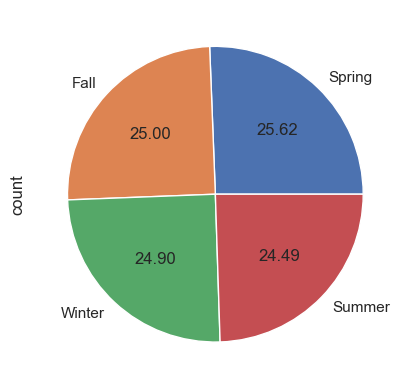

In [36]:
df['Season'].value_counts().plot(kind='pie', autopct='%1.2f')

In [38]:
pd.crosstab(df["Season"], df["Payment_Method"])

Payment_Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Season,,,,,,
Fall,157,156,183,172,155,152
Spring,181,170,178,150,155,165
Summer,156,159,155,154,164,167
Winter,138,163,180,157,164,169


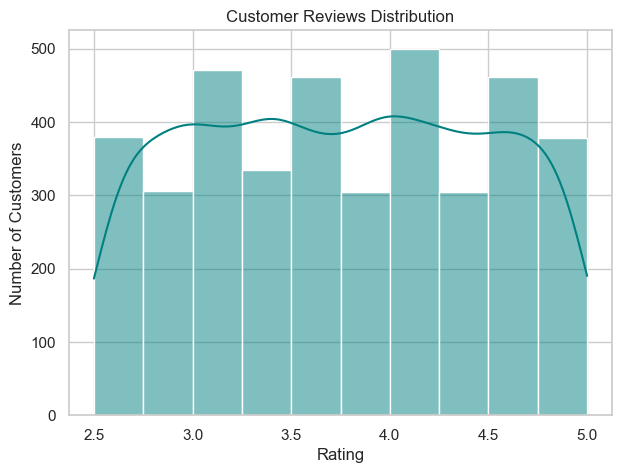

In [40]:
plt.figure(figsize=(7, 5))
sns.histplot(df["Review_Rating"], bins=10, kde=True, color="teal")
plt.title("Customer Reviews Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Customers")
plt.show()